## 資料處理(補值、型態)

In [1]:
#以下讀新的黨
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

alldf = pd.read_csv('new_statcast_standard_salary.csv')
alldf

,Name,draft_year,signing_bonus,contract start year,tenure,wage,signed age,contract length,start or relief,Season,...,XBA,XSLG,WOBA,XWOBA,XWOBACON,HardHit%,K%,BB%,ERA_y,xERA
0,A.J. Achter,2010,0,2016,3,507500,27,1,Relief Pitcher,2015,...,0.279,0.595,0.335,0.402,0.519,34.2,24.1,10.3,6.75,7.25
1,A.J. Cole,2010,2000000,2016,2,507500,23,1,Relief Pitcher,2015,...,0.289,0.413,0.340,0.318,0.404,47.1,20.5,2.3,5.79,4.19
2,A.J. Cole,2010,2000000,2017,3,535000,24,1,Relief Pitcher,2016,...,0.187,0.366,0.328,0.273,0.313,26.5,23.2,8.3,5.17,3.09
3,A.J. Cole,2010,2000000,2018,4,555300,26,1,Relief Pitcher,2017,...,0.260,0.434,0.348,0.347,0.377,34.2,19.1,12.2,3.81,5.30
4,A.J. Cole,2010,2000000,2019,5,555000,26,1,Relief Pitcher,2018,...,0.243,0.448,0.389,0.333,0.423,36.2,26.7,10.0,6.14,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,Zack Greinke,2002,2475000,2022,19,13000000,38,1,Starting pitcher,2021,...,0.266,0.430,0.309,0.320,0.365,35.4,17.2,5.2,4.16,4.35
1880,Zack Greinke,2002,2475000,2023,20,8500000,39,1,Starting pitcher,2022,...,0.284,0.441,0.321,0.336,0.365,39.6,12.5,4.6,3.68,4.78
1881,Zack Wheeler,2009,3300000,2018,6,1900000,27,1,Starting pitcher,2017,...,0.259,0.439,0.355,0.338,0.385,35.9,21.0,10.4,5.21,4.99
1882,Zack Wheeler,2009,3300000,2019,7,5975000,28,1,Starting pitcher,2018,...,0.219,0.334,0.272,0.278,0.326,27.1,24.1,7.4,3.31,3.23


In [2]:

alldf = alldf.drop(columns = ['start or relief','draft_year','contract start year' ,'contract length','Season','Tm','LG','Age','wage','ERA_y'])


In [3]:
alldf['Barrel %'] = alldf['Barrel %'].replace('--', float('nan'))
alldf['Barrel %'] = alldf['Barrel %'].astype(float)
alldf['Barrel %']

0       18.4
1        5.9
2        9.7
3        5.2
4       10.7
        ... 
1879     6.5
1880     6.8
1881     8.4
1882     4.8
1883     5.3
Name: Barrel %, Length: 1884, dtype: float64

In [4]:
alldf['Exit Velocity'] = alldf['Exit Velocity'].replace('--', float('nan'))
alldf['Exit Velocity'] = alldf['Exit Velocity'].astype(float)
alldf['Exit Velocity']

0       88.5
1       90.8
2       88.8
3       87.8
4       88.1
        ... 
1879    88.3
1880    88.9
1881    87.6
1882    86.1
1883    87.0
Name: Exit Velocity, Length: 1884, dtype: float64

In [5]:
column_names = ['Max EV', 'Launch Angle', 'Sweet Spot %', 'HardHit%']
alldf[column_names] = alldf[column_names].apply(pd.to_numeric, errors='coerce')
alldf

,Name,signing_bonus,tenure,signed age,adjusted wage,BF,W,L,ERA_x,G,...,Sweet Spot %,XBA,XSLG,WOBA,XWOBA,XWOBACON,HardHit%,K%,BB%,xERA
0,A.J. Achter,0,3,27,654675,58.0,0.0,1.0,6.75,11.0,...,42.1,0.279,0.595,0.335,0.402,0.519,34.2,24.1,10.3,7.25
1,A.J. Cole,2000000,2,23,654675,44.0,0.0,0.0,5.79,3.0,...,29.4,0.289,0.413,0.340,0.318,0.404,47.1,20.5,2.3,4.19
2,A.J. Cole,2000000,3,24,675789,168.0,1.0,2.0,5.17,8.0,...,28.3,0.187,0.366,0.328,0.273,0.313,26.5,23.2,8.3,3.09
3,A.J. Cole,2000000,4,26,684670,229.0,3.0,5.0,3.81,11.0,...,32.9,0.260,0.434,0.348,0.347,0.377,34.2,19.1,12.2,5.30
4,A.J. Cole,2000000,5,26,671990,221.0,4.0,2.0,6.14,32.0,...,41.4,0.243,0.448,0.389,0.333,0.423,36.2,26.7,10.0,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,Zack Greinke,2475000,19,38,13750597,697.0,11.0,6.0,4.16,30.0,...,35.3,0.266,0.430,0.309,0.320,0.365,35.4,17.2,5.2,4.35
1880,Zack Greinke,2475000,20,39,8500000,585.0,4.0,9.0,3.68,26.0,...,34.4,0.284,0.441,0.321,0.336,0.365,39.6,12.5,4.6,4.78
1881,Zack Wheeler,3300000,6,27,2342652,386.0,3.0,7.0,5.21,17.0,...,36.6,0.259,0.439,0.355,0.338,0.385,35.9,21.0,10.4,4.99
1882,Zack Wheeler,3300000,7,28,7234493,744.0,12.0,7.0,3.31,29.0,...,32.9,0.219,0.334,0.272,0.278,0.326,27.1,24.1,7.4,3.23


In [6]:
na_counts = alldf.isna().sum()
print(na_counts)

Name             0
signing_bonus    0
tenure           0
signed age       0
adjusted wage    0
BF               0
W                0
L                0
ERA_x            0
G                0
GS               0
SV               0
IP               0
H                0
R                0
ER               0
HR               0
BB               0
SO               0
WHIP             0
Pitches          0
Batted Balls     0
Barrels          0
Barrel %         1
Barrel/PA        0
Exit Velocity    1
Max EV           1
Launch Angle     1
Sweet Spot %     1
XBA              0
XSLG             0
WOBA             0
XWOBA            0
XWOBACON         0
HardHit%         1
K%               0
BB%              0
xERA             0
dtype: int64


In [7]:
columnslists  = ['Max EV','Launch Angle','Sweet Spot %','HardHit%',]
mean_value = alldf[column_names].mean()
mean_value
alldf[columnslists] = alldf[columnslists].fillna(mean_value)

mean_values = alldf['Barrel %'].mean()
alldf['Barrel %'] = alldf['Barrel %'] .fillna(mean_values)
mean_values

mean_values = alldf['Exit Velocity'].mean()
alldf['Exit Velocity'] = alldf['Exit Velocity'].fillna(mean_values)
mean_values

alldf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           1884 non-null   object 
 1   signing_bonus  1884 non-null   int64  
 2   tenure         1884 non-null   int64  
 3   signed age     1884 non-null   int64  
 4   adjusted wage  1884 non-null   int64  
 5   BF             1884 non-null   float64
 6   W              1884 non-null   float64
 7   L              1884 non-null   float64
 8   ERA_x          1884 non-null   float64
 9   G              1884 non-null   float64
 10  GS             1884 non-null   float64
 11  SV             1884 non-null   float64
 12  IP             1884 non-null   float64
 13  H              1884 non-null   float64
 14  R              1884 non-null   float64
 15  ER             1884 non-null   float64
 16  HR             1884 non-null   float64
 17  BB             1884 non-null   float64
 18  SO      

In [8]:
na_counts = alldf.isna().sum()
print(na_counts)

Name             0
signing_bonus    0
tenure           0
signed age       0
adjusted wage    0
BF               0
W                0
L                0
ERA_x            0
G                0
GS               0
SV               0
IP               0
H                0
R                0
ER               0
HR               0
BB               0
SO               0
WHIP             0
Pitches          0
Batted Balls     0
Barrels          0
Barrel %         0
Barrel/PA        0
Exit Velocity    0
Max EV           0
Launch Angle     0
Sweet Spot %     0
XBA              0
XSLG             0
WOBA             0
XWOBA            0
XWOBACON         0
HardHit%         0
K%               0
BB%              0
xERA             0
dtype: int64


In [9]:
alldf.to_csv('MLBfinaldata.csv')

## train_test_split

In [10]:
pd.set_option('display.max_columns', 40)
alldf.loc[alldf['Name'] == "Zack Wheeler"]

,Name,signing_bonus,tenure,signed age,adjusted wage,BF,W,L,ERA_x,G,GS,SV,IP,H,R,ER,HR,BB,SO,WHIP,Pitches,Batted Balls,Barrels,Barrel %,Barrel/PA,Exit Velocity,Max EV,Launch Angle,Sweet Spot %,XBA,XSLG,WOBA,XWOBA,XWOBACON,HardHit%,K%,BB%,xERA
1881,Zack Wheeler,3300000,6,27,2342652,386.0,3.0,7.0,5.21,17.0,17.0,0.0,86.1,97.0,53.0,50.0,15.0,40.0,81.0,1.59,1561,262,22,8.4,5.7,87.6,113.0,8.7,36.6,0.259,0.439,0.355,0.338,0.385,35.9,21.0,10.4,4.99
1882,Zack Wheeler,3300000,7,28,7234493,744.0,12.0,7.0,3.31,29.0,29.0,0.0,182.1,150.0,69.0,67.0,14.0,55.0,179.0,1.12,2884,501,24,4.8,3.2,86.1,112.9,11.3,32.9,0.219,0.334,0.272,0.278,0.326,27.1,24.1,7.4,3.23
1883,Zack Wheeler,3300000,8,29,28232457,828.0,11.0,8.0,3.96,31.0,31.0,0.0,195.1,196.0,93.0,86.0,22.0,50.0,195.0,1.26,3159,580,31,5.3,3.7,87.0,117.6,12.3,34.5,0.246,0.393,0.294,0.297,0.366,32.4,23.6,6.0,3.86


In [11]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, mutual_info_regression, f_regression

In [12]:

from sklearn.model_selection import train_test_split

alldf = alldf.groupby(['Name']).mean()

X = alldf.drop(columns = ['adjusted wage']) 
Y = alldf['adjusted wage']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10, random_state= 42)
print(f'訓練樣本的shape: {X_train.shape}')
print(f'測試樣本的shape: {X_test.shape}')

訓練樣本的shape: (519, 36)
測試樣本的shape: (58, 36)


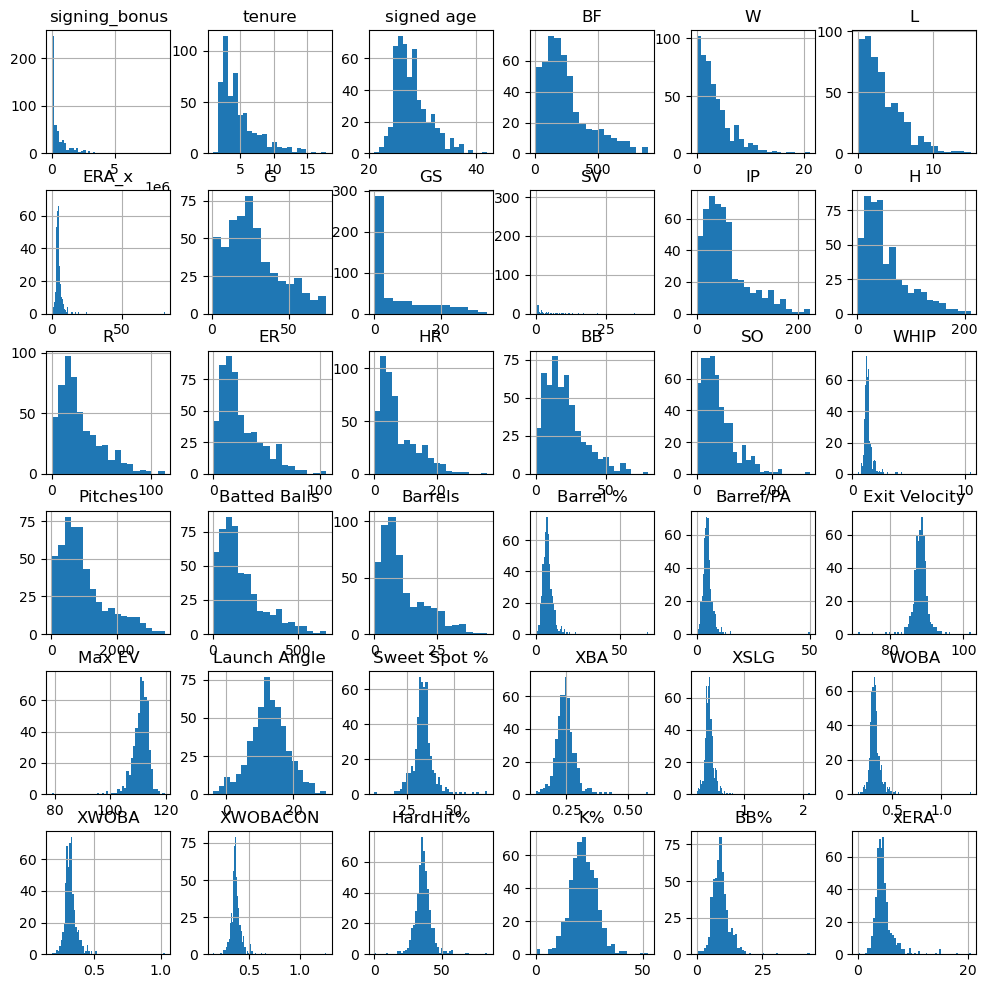

In [13]:
X_train.hist(figsize = [12,12], bins = 'auto')
import matplotlib.pyplot as plt
plt.show()

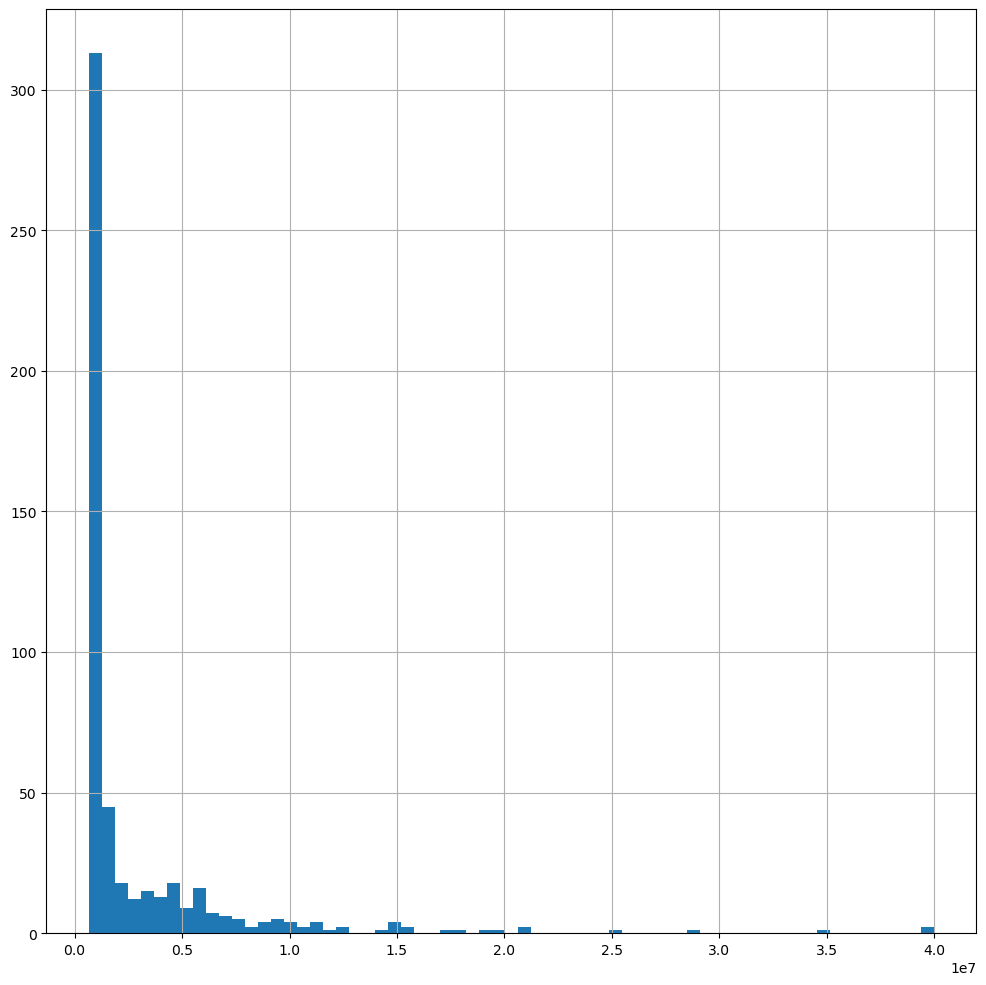

In [14]:
y_train.hist(figsize = [12,12], bins = 'auto')
plt.show()

## 前處理(標準化、對數)

In [15]:
#以上觀察完資料，開始標準化 
#preprocess 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

#標準化資料

num_cols = X_train.select_dtypes(['int', 'float']).columns
numeric_pipeline = Pipeline([('numnorm', StandardScaler()), # apply a standard scaler
                             ])
pitch_adv_ct = ColumnTransformer(transformers = [("numpipe", numeric_pipeline, num_cols)])

pitch_adv_ct

ColumnTransformer(transformers=[('numpipe',
                                 Pipeline(steps=[('numnorm',
                                                  StandardScaler())]),
                                 Index(['signing_bonus', 'tenure', 'signed age', 'BF', 'W', 'L', 'ERA_x', 'G',
       'GS', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'Pitches',
       'Batted Balls', 'Barrels', 'Barrel %', 'Barrel/PA', 'Exit Velocity',
       'Max EV', 'Launch Angle', 'Sweet Spot %', 'XBA', 'XSLG', 'WOBA',
       'XWOBA', 'XWOBACON', 'HardHit%', 'K%', 'BB%', 'xERA'],
      dtype='object'))])

In [16]:
#存起來

import pickle

pickle.dump(pitch_adv_ct, open('pkl.pitch_adv_ct.pkl', 'wb')) 
pitch_adv_ct  = pickle.load(open('pkl.pitch_adv_ct.pkl', 'rb'))

In [17]:
pp_X_train = pd.DataFrame(pitch_adv_ct.fit_transform(X_train))
pp_X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,-0.594249,-0.210727,-0.083917,-0.371056,-0.343530,-0.344807,0.043116,-0.956044,0.057665,-0.353777,-0.394755,-0.330442,-0.190958,-0.208571,-0.405578,-0.406830,-0.553600,-0.289558,-0.377345,-0.295791,-0.384322,-0.034741,0.164725,0.749820,0.699165,-0.422131,0.102876,0.693998,0.381986,-0.247445,0.309904,0.196191,0.642322,-0.768126,-0.890332,0.122674
1,-0.593357,-0.122726,0.468051,-0.295609,-0.213217,0.116811,0.178648,0.850934,-0.742554,1.028751,-0.271075,-0.400626,-0.243237,-0.217247,-0.129477,-0.364951,-0.019707,-0.115596,-0.241589,-0.367084,-0.147686,0.127811,0.006376,-0.313252,-0.094784,1.409285,0.733973,-0.205119,-0.136346,-0.188616,-0.335944,-0.048948,-0.294601,0.444954,-0.329748,-0.275410
2,-0.594249,0.581275,1.098871,2.128744,1.767531,2.271032,-0.099508,0.141744,1.961633,-0.313115,2.087963,2.274412,2.217889,2.264125,2.162153,1.968342,1.628399,-0.121395,2.240796,2.212422,2.124015,0.069459,0.164725,-0.273136,0.495455,-0.022711,0.115994,0.376296,0.296886,0.120234,0.203822,0.105596,-0.261903,-0.449725,-0.420011,0.084489
3,-0.576412,1.461277,1.698150,0.163655,-0.108967,-0.067836,-0.052623,0.058195,0.007996,-0.256187,0.162144,0.399880,0.405021,0.436933,1.516079,-0.790926,-0.189160,-0.374800,0.068236,0.383954,1.143397,0.745507,1.069078,0.347858,0.896608,0.820510,0.502522,0.687768,0.971491,0.157002,0.472770,0.592678,0.084696,-0.687605,-1.620041,0.352570
4,1.724487,0.581275,-0.162769,0.621411,0.360157,0.624592,-0.025438,-0.650023,0.926868,-0.353777,0.610758,0.656154,0.810383,0.852086,1.292438,0.248286,0.862378,-0.298256,0.633726,0.548057,1.092284,0.915561,0.815718,0.683628,0.276074,0.552011,0.288707,0.033676,0.578100,0.147810,0.202262,0.901633,0.642322,0.694281,-0.890332,0.120040


In [18]:
pp_X_test = pd.DataFrame(pitch_adv_ct.transform(X_test))
pp_X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.319868,0.229274,0.941166,-0.600140,-0.525967,-0.683328,-0.356783,0.540056,-0.742554,-0.231790,-0.590358,-0.629228,-0.653425,-0.659729,-0.792118,-0.436744,-0.453012,-0.248967,-0.602500,-0.649663,-0.848127,-0.826659,-0.867480,-0.561970,-0.267155,-0.223900,0.040204,-0.653639,-0.812497,-0.325883,-0.610507,-0.555215,-1.026533,0.660730,0.287845,-0.601953
1,-0.412852,-1.002728,-0.951295,-0.331275,-0.108967,-0.437131,-0.378846,1.142382,-0.632179,-0.109802,-0.352513,-0.504901,-0.492567,-0.520911,-0.405578,0.185467,-0.263441,-0.228672,-0.322002,-0.389120,-0.696680,-0.709956,-0.732589,-1.982073,-0.570110,0.163685,-0.924660,-1.255819,-0.940919,-0.607771,-0.729069,-1.082797,-1.934531,0.250230,0.905437,-0.697633
2,-0.460475,0.229274,0.152641,-0.531552,-0.682342,-0.683328,-0.377664,0.646920,-0.742554,-0.191127,-0.526045,-0.601154,-0.564953,-0.607673,-0.654068,-0.257260,-0.197671,0.125052,-0.484010,-0.644478,-0.791335,-0.672444,-0.785373,0.801970,-0.063444,-1.147005,-1.248225,-1.122924,-0.978053,-0.445992,-1.072273,-0.339385,1.116443,1.681718,1.185729,-0.795947
3,-0.594249,-1.002728,-0.005064,-1.099459,-0.734467,-1.175721,0.363429,-0.897754,-0.742554,-0.353777,-1.106005,-0.962104,-1.023398,-0.989422,-0.571238,-1.393992,-1.029462,0.188838,-1.105315,-1.042422,-0.810265,1.240665,1.449117,3.120669,-0.570110,-1.149964,1.558918,1.435302,1.742025,1.392406,1.348876,2.338497,3.271995,0.344961,-2.001998,1.172087
4,-0.594249,-0.474727,-0.162769,-0.478053,-0.421717,-0.344807,-0.228737,0.734355,-0.742554,-0.109802,-0.413021,-0.571075,-0.480502,-0.520911,-0.239918,-0.676056,-0.385308,-0.624436,-0.432687,-0.463005,-0.327529,0.352882,0.349467,0.039768,-0.045163,1.126732,-1.239480,-0.869593,-0.246974,-0.585710,-0.635467,-0.435309,-0.214114,0.266018,-0.405759,-0.612048


In [19]:
print(pp_X_train.shape)
print(pp_X_test.shape)

(519, 36)
(58, 36)


In [20]:
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

In [21]:
print(log_y_train.shape)
print(log_y_test.shape)

(519,)
(58,)


## 建模

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
def model_results(model, X_train, y_train, X_test, y_test, cv =10):

    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    train_rmse = mean_squared_error(y_train, train_preds, squared=False)
    test_rmse = mean_squared_error(y_test, test_preds, squared=False)
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)
    
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    mean_cv_rmse = -scores.mean()
    mean_cv_r2 = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2').mean()
    
    print("Training RMSE: ", train_rmse)
    print("Testing RMSE: ", test_rmse)
    print("Training R^2: ", train_r2)
    print("Testing R^2: ", test_r2)
    print("Cross Validation RMSE: ", mean_cv_rmse)
    print("Cross Validation R^2: ", mean_cv_r2)

### linear

In [24]:
#linear 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
steps=[('preprocess', pitch_adv_ct), ('model', LinearRegression())]
linreg_pipeline = Pipeline(steps)
linreg_pipeline.fit(X_train, log_y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['signing_bonus', 'tenure', 'signed age', 'BF', 'W', 'L', 'ERA_x', 'G',
       'GS', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'Pitches',
       'Batted Balls', 'Barrels', 'Barrel %', 'Barrel/PA', 'Exit Velocity',
       'Max EV', 'Launch Angle', 'Sweet Spot %', 'XBA', 'XSLG', 'WOBA',
       'XWOBA', 'XWOBACON', 'HardHit%', 'K%', 'BB%', 'xERA'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
#前面處理完資料了 這邊呼叫第二個步驟
lr_model = linreg_pipeline.steps[1][1]

In [26]:
model_results(lr_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.41862929475001054
Testing RMSE:  0.43235003019343976
Training R^2:  0.8209098197737023
Testing R^2:  0.7473239516966562
Cross Validation RMSE:  0.22476154683713076
Cross Validation R^2:  0.7581421234043759


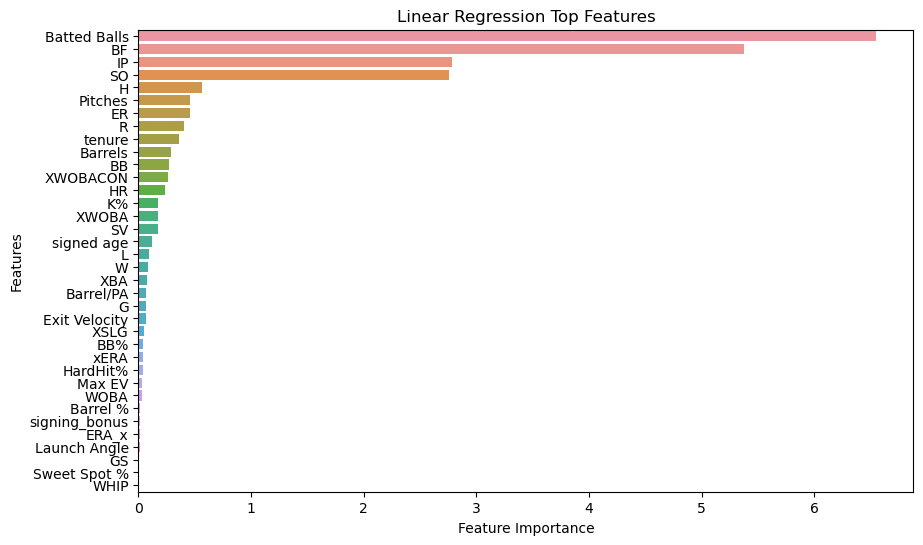

In [27]:
coef_abs = abs(lr_model.coef_)

feature_importance = pd.Series(coef_abs, index=X_train.columns)

sorted_features = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index)
plt.title('Linear Regression Top Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### Ridge

In [28]:
from sklearn.linear_model import Ridge

ridge_steps = [
    ('preprocess', pitch_adv_ct),
    ('model', Ridge(alpha=1))  # <------ Whatever string you assign here will be used later
]

ridge_pipeline = Pipeline(ridge_steps)
ridge_pipeline.fit(X_train, log_y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['signing_bonus', 'tenure', 'signed age', 'BF', 'W', 'L', 'ERA_x', 'G',
       'GS', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'Pitches',
       'Batted Balls', 'Barrels', 'Barrel %', 'Barrel/PA', 'Exit Velocity',
       'Max EV', 'Launch Angle', 'Sweet Spot %', 'XBA', 'XSLG', 'WOBA',
       'XWOBA', 'XWOBACON', 'HardHit%', 'K%', 'BB%', 'xERA'],
      dtype='object'))])),
                ('model', Ridge(alpha=1))])

In [29]:
ridge_model = ridge_pipeline.steps[1][1]

model_results(ridge_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.4230218856253057
Testing RMSE:  0.43049120578356437
Training R^2:  0.8171317895024292
Testing R^2:  0.749491967023371
Cross Validation RMSE:  0.22268084090813917
Cross Validation R^2:  0.7603520846021835


In [30]:
coef_abs = abs(ridge_model.coef_)

feature_importance = pd.Series(coef_abs, index=X_train.columns)

sorted_features = feature_importance.sort_values(ascending=False)
print(sorted_features)

SO               0.612514
Pitches          0.367764
tenure           0.367302
Barrels          0.280710
ER               0.267000
H                0.219881
HR               0.219813
R                0.201607
SV               0.169916
BB               0.151907
Barrel/PA        0.135890
XWOBACON         0.131729
signed age       0.122296
K%               0.119857
Batted Balls     0.097932
IP               0.087765
L                0.087750
W                0.080592
XBA              0.076760
XSLG             0.073028
G                0.069088
Exit Velocity    0.062849
WOBA             0.059335
Barrel %         0.055995
HardHit%         0.042649
xERA             0.042424
BF               0.030146
Max EV           0.029715
WHIP             0.020012
Launch Angle     0.018696
GS               0.017678
ERA_x            0.017412
signing_bonus    0.013575
Sweet Spot %     0.002362
XWOBA            0.001470
BB%              0.000491
dtype: float64


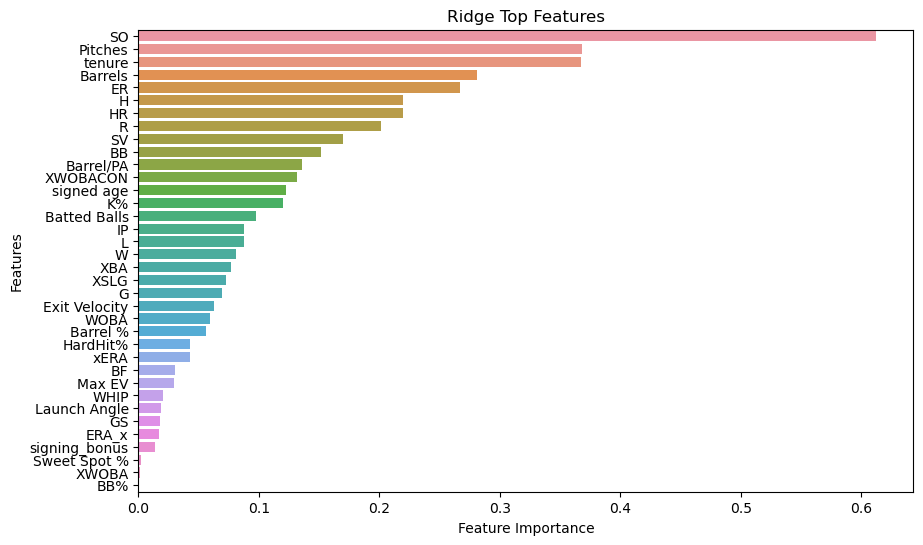

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index)
plt.title('Ridge Top Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### lasso

In [32]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.1)

lasso_pipeline = Pipeline(steps=[
    ('preprocess', pitch_adv_ct),
    ('model', lasso)
])

lasso_pipeline.fit(X_train, log_y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['signing_bonus', 'tenure', 'signed age', 'BF', 'W', 'L', 'ERA_x', 'G',
       'GS', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'Pitches',
       'Batted Balls', 'Barrels', 'Barrel %', 'Barrel/PA', 'Exit Velocity',
       'Max EV', 'Launch Angle', 'Sweet Spot %', 'XBA', 'XSLG', 'WOBA',
       'XWOBA', 'XWOBACON', 'HardHit%', 'K%', 'BB%', 'xERA'],
      dtype='object'))])),
                ('model', Lasso(alpha=0.1))])

In [33]:
lasso_model = lasso_pipeline.steps[1][1]

model_results(lasso_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.4877962387769141
Testing RMSE:  0.4878362884482359
Training R^2:  0.7568415109695258
Testing R^2:  0.6783072342441386
Cross Validation RMSE:  0.2471863304527596
Cross Validation R^2:  0.7396776086229773


In [34]:

#尋找重要的特徵
selected_features_index = lasso_model.coef_ != 0
selected_features = X_train.columns[selected_features_index]

# 輸出選擇的特徵
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['tenure', 'signed age', 'SV', 'SO'], dtype='object')


### SVR

In [35]:
from sklearn import svm
from sklearn.svm import LinearSVR
svm_steps = [('preprocess', pitch_adv_ct), ('model', svm.SVR())]
svm_pipeline = Pipeline(svm_steps)

svm_grid = {
            'model__kernel': ['rbf'], #高斯轉換
            'model__C': [0.1, 1, 10],
            'model__degree': [1,4]
           }  

svm_model = GridSearchCV(estimator = svm_pipeline,
                         param_grid = svm_grid,
                         scoring = 'r2') #用r2找最好的


svm_model.fit(X_train, log_y_train)
display(svm_model.best_params_)
print("Best CV Score:", round(svm_model.best_score_,5))

{'model__C': 1, 'model__degree': 1, 'model__kernel': 'rbf'}

Best CV Score: 0.79249


In [36]:
best_model = svm_model.best_estimator_
svm_model = best_model.steps[1][1] 

model_results(svm_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.3153613977149561
Testing RMSE:  0.44631309308918327
Training R^2:  0.8983682029090593
Testing R^2:  0.7307396884430299
Cross Validation RMSE:  0.1965087308074746
Cross Validation R^2:  0.7907806396961229


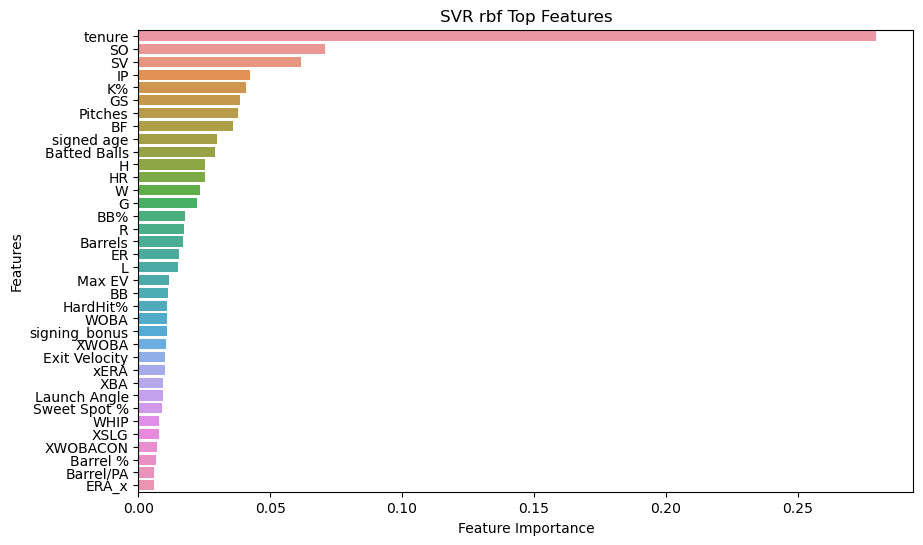

In [37]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svm_model, pp_X_train, log_y_train, n_repeats=10, random_state=42)
feature_importance = result.importances_mean

feature_importance_series = pd.Series(feature_importance, index=X_train.columns)
sorted_features = feature_importance_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index)
plt.title('SVR rbf Top Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [38]:
from sklearn import svm
from sklearn.svm import LinearSVR
svm_steps = [('preprocess', pitch_adv_ct), ('model', svm.SVR())]
svm_pipeline = Pipeline(svm_steps)

svm_grid = {
            'model__kernel': ['poly'], # poly
            'model__C': [0.1, 1, 10],
            'model__degree': [1, 4]
           }  

svm_model = GridSearchCV(estimator = svm_pipeline,
                         param_grid = svm_grid,
                         scoring = 'r2') #用r2找最好的


svm_model.fit(X_train, log_y_train)
display(svm_model.best_params_)
print("Best CV Score:", round(svm_model.best_score_,5)) 

{'model__C': 1, 'model__degree': 1, 'model__kernel': 'poly'}

Best CV Score: 0.77741


In [39]:
best_model = svm_model.best_estimator_
svm_model = best_model.steps[1][1] 

model_results(svm_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.43483178882326295
Testing RMSE:  0.4273883248808701
Training R^2:  0.8067786493037009
Testing R^2:  0.7530901604089308
Cross Validation RMSE:  0.21066983407796966
Cross Validation R^2:  0.772169902449302


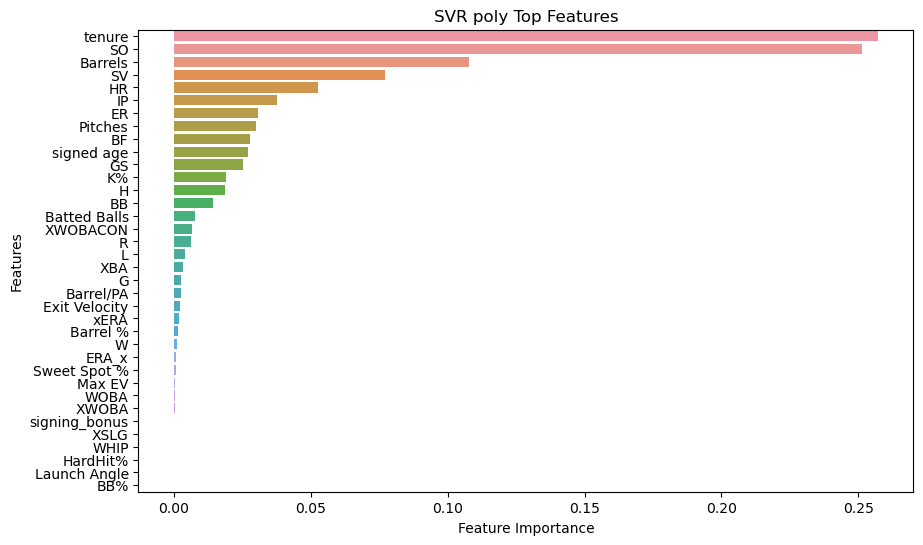

In [40]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svm_model, pp_X_train, log_y_train, n_repeats=10, random_state=42)
feature_importance = result.importances_mean

feature_importance_series = pd.Series(feature_importance, index=X_train.columns)
sorted_features = feature_importance_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index)
plt.title('SVR poly Top Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### Gradient Boosting Regressor

In [41]:
#Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor
ensemble_steps = [('preprocess', pitch_adv_ct), 
                  ('model', GradientBoostingRegressor(random_state = 42))]

ensemble_pipeline = Pipeline(ensemble_steps)

ensemble_grid = {
                'model__learning_rate': [0.1], #學習率
                'model__n_estimators': [50], #迭代次數
                'model__max_depth': [5], #深度
                'model__max_features': [15, 30] #變數數量
               }  

ensemble_model = GridSearchCV(estimator = ensemble_pipeline,
                         param_grid = ensemble_grid,
                         scoring = 'r2')

ensemble_model.fit(X_train, log_y_train)
display(ensemble_model.best_params_)
print("Best CV Score:", round(ensemble_model.best_score_,5))

{'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__max_features': 15,
 'model__n_estimators': 50}

Best CV Score: 0.82675


In [42]:
best_model = ensemble_model.best_estimator_
ensemble_model = best_model.steps[1][1]  

model_results(ensemble_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.07846902066144018
Testing RMSE:  0.41913892583427903
Training R^2:  0.9937077060011765
Testing R^2:  0.7625298202377087
Cross Validation RMSE:  0.1759844646634873
Cross Validation R^2:  0.8122669406884088


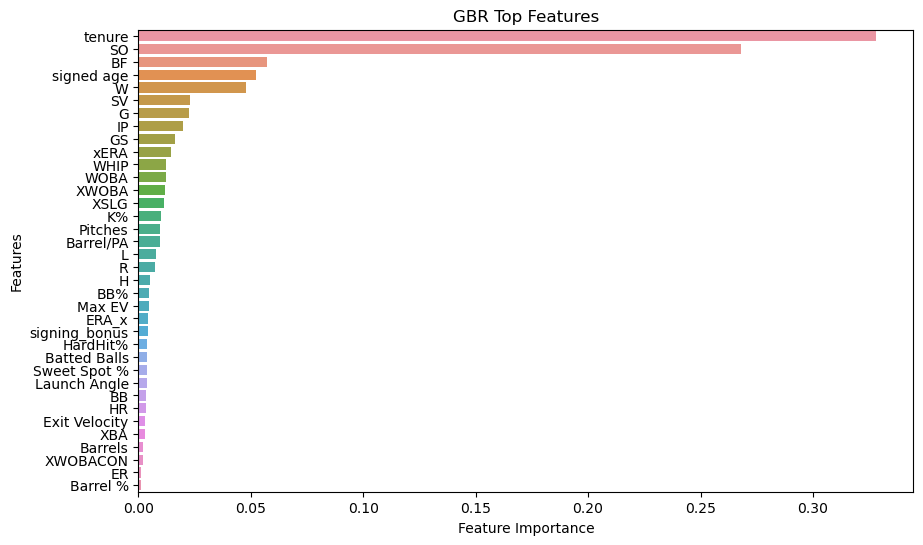

In [43]:
feature_importance = ensemble_model.feature_importances_
feature_importance = pd.Series(feature_importance, index=X_train.columns)
sorted_features = feature_importance.sort_values(ascending=False)

# 繪製長條圖
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index)
plt.title('GBR Top Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### 隨機森林

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr_steps = [('preprocess', pitch_adv_ct), 
            ('model', RandomForestRegressor(random_state = 42))]

rfr_pipeline = Pipeline(rfr_steps)

rfr_grid = {'model__n_estimators': [120], #120tree
            'model__max_depth': [3, 10], #depth
            'model__max_features': [30]}  

rfr_model = GridSearchCV(estimator = rfr_pipeline,
                           param_grid = rfr_grid,
                           scoring = 'r2')

rfr_model.fit(X_train, log_y_train)
rfr_model.best_params_
display(rfr_model.best_params_)
print("Best CV Score:", round(rfr_model.best_score_,5))

{'model__max_depth': 10, 'model__max_features': 30, 'model__n_estimators': 120}

Best CV Score: 0.81835


In [45]:

best_model = rfr_model.best_estimator_
rfr_model = best_model.steps[1][1]  

model_results(rfr_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.15935713856124067
Testing RMSE:  0.4305946087786121
Training R^2:  0.9740489109920693
Testing R^2:  0.7493716096664753
Cross Validation RMSE:  0.176120425724815
Cross Validation R^2:  0.809776449480362


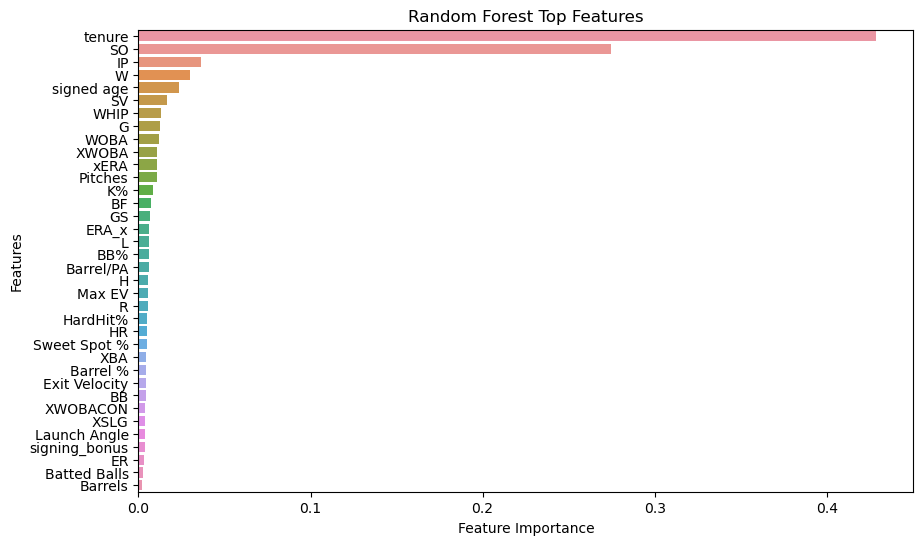

In [46]:
feature_importance = rfr_model.feature_importances_
feature_importance = pd.Series(feature_importance, index=X_train.columns)
sorted_features = feature_importance.sort_values(ascending=False)

# 繪製長條圖
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index)
plt.title('Random Forest Top Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### xgb

In [47]:
import xgboost as xgb
from xgboost import XGBRegressor

#XGboost

xgb_steps = [('preprocess', pitch_adv_ct), 
            ('model', XGBRegressor())]

xgb_pipeline = Pipeline(xgb_steps)

xgb_grid = {'model__n_estimators': [100, 120, 130],
            'model__max_depth': [4, 5, 10],
            'model__learning_rate': [0.1]}  

xgb_model = GridSearchCV(estimator = xgb_pipeline,
                           param_grid = xgb_grid,
                           scoring = 'r2')

xgb_model.fit(X_train, log_y_train)
display(xgb_model.best_params_)
print("Best CV Score:", round(xgb_model.best_score_,5))

{'model__learning_rate': 0.1,
 'model__max_depth': 4,
 'model__n_estimators': 120}

Best CV Score: 0.84058


In [48]:

best_model = xgb_model.best_estimator_
xgb_model = best_model.steps[1][1]  

model_results(xgb_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.08943781856802424
Testing RMSE:  0.42584007480311553
Training R^2:  0.9918256178408107
Testing R^2:  0.7548758234171971
Cross Validation RMSE:  0.15367826293414205
Cross Validation R^2:  0.8396491700319219


In [49]:
test_sizes = [0.1, 0.2, 0.3, 0.4]  # 不同的測試資料集比例

for test_size in test_sizes:
    # 將資料集分為訓練集和測試集
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=test_size, random_state=42)

    log_y_train1 = np.log(y_train1)
    log_y_test1 = np.log(y_test1)
    pp_X_train1 = pd.DataFrame(pitch_adv_ct.fit_transform(X_train1))
    pp_X_test1 = pd.DataFrame(pitch_adv_ct.fit_transform(X_test1))

    xgb_steps = [('preprocess', pitch_adv_ct), 
            ('model', XGBRegressor())]

    xgb_pipeline = Pipeline(xgb_steps)

    xgb_grid = {'model__n_estimators': [100, 120, 130],
                'model__max_depth': [4, 5, 10],
                'model__learning_rate': [0.1]}  

    xgb_model = GridSearchCV(estimator = xgb_pipeline,
                              param_grid = xgb_grid,
                             scoring = 'r2')

    xgb_model.fit(X_train1, log_y_train1)
    display(xgb_model.best_params_)
    print("Best CV Score:", round(xgb_model.best_score_,5))
    
    best_model = xgb_model.best_estimator_
    xgb_model = best_model.steps[1][1]  

    model_results(xgb_model, pp_X_train1, log_y_train1, pp_X_test1, log_y_test1)


    
    

{'model__learning_rate': 0.1,
 'model__max_depth': 4,
 'model__n_estimators': 120}

Best CV Score: 0.84058
Training RMSE:  0.08943781856802424
Testing RMSE:  0.40188584638103636
Training R^2:  0.9918256178408107
Testing R^2:  0.7816774919203235
Cross Validation RMSE:  0.15367826293414205
Cross Validation R^2:  0.8396491700319219


{'model__learning_rate': 0.1,
 'model__max_depth': 4,
 'model__n_estimators': 130}

Best CV Score: 0.8297
Training RMSE:  0.0750184190926209
Testing RMSE:  0.39711837988871174
Training R^2:  0.9942458244745305
Testing R^2:  0.8168426792478496
Cross Validation RMSE:  0.14732848329148024
Cross Validation R^2:  0.8432233892447272


{'model__learning_rate': 0.1,
 'model__max_depth': 10,
 'model__n_estimators': 130}

Best CV Score: 0.82163
Training RMSE:  0.0034119076650505602
Testing RMSE:  0.4374193370464309
Training R^2:  0.9999882559034948
Testing R^2:  0.7800456780217758
Cross Validation RMSE:  0.17920643231568067
Cross Validation R^2:  0.8086279391581075


{'model__learning_rate': 0.1,
 'model__max_depth': 4,
 'model__n_estimators': 130}

Best CV Score: 0.82309
Training RMSE:  0.0561835320559568
Testing RMSE:  0.42599670903323916
Training R^2:  0.9965823548988743
Testing R^2:  0.8176729982174342
Cross Validation RMSE:  0.16048070953810573
Cross Validation R^2:  0.8115900426355832


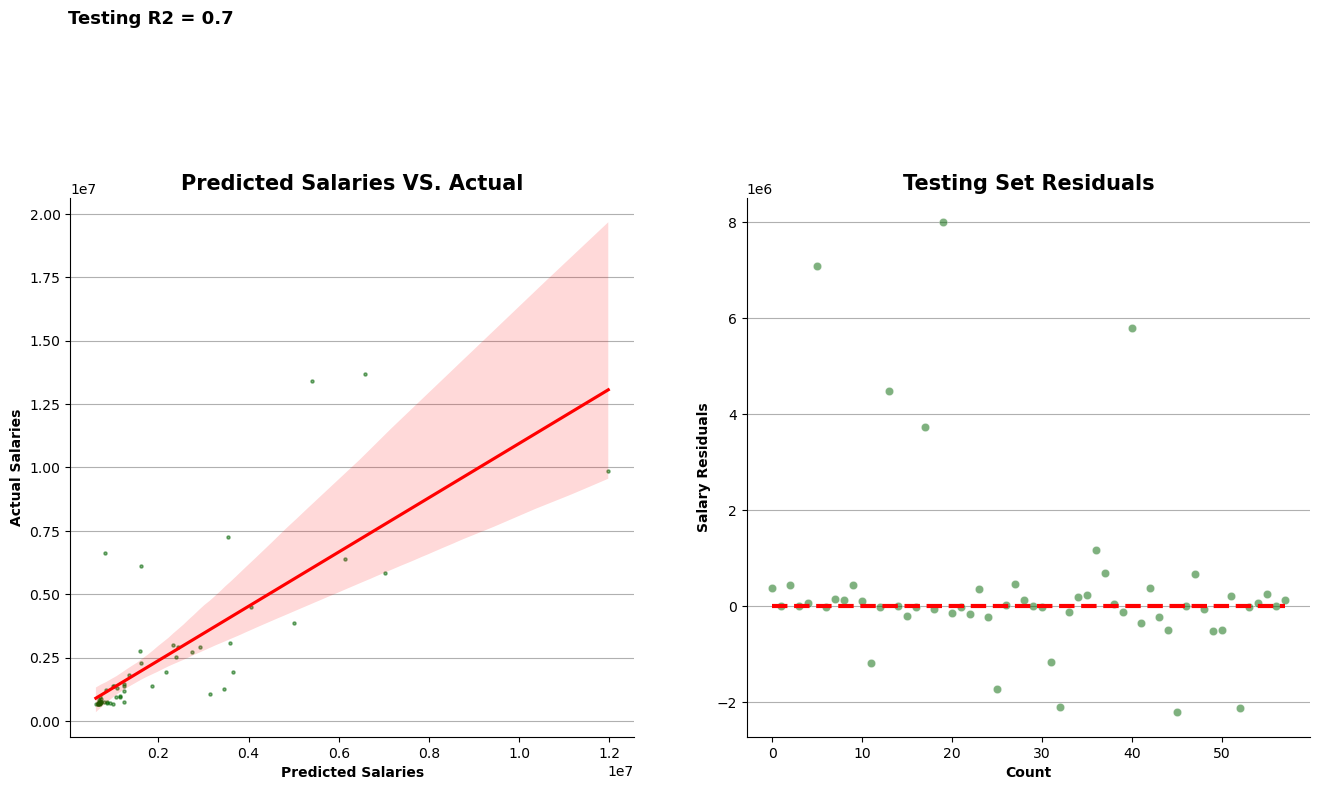

In [50]:
#視覺畫這些模型 

y_pred_test = xgb_model.predict(pp_X_test) #這裡可以丟任何一個模型
resid = y_test - np.exp(y_pred_test) #找殘差

import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
sns.regplot(ax = axes[0], 
            x = np.exp(y_pred_test), 
            y = y_test,
            scatter_kws={'s':5, 'alpha': 0.5, 'color': 'darkgreen'},
            line_kws={"color": "red"})

axes[0].text(50, 2.75e7, "Testing R2 = 0.7", 
             horizontalalignment='left', fontsize=13, color='black', weight = 'bold')

axes[0].set_xlabel('Predicted Salaries', weight = 'bold') 
axes[0].set_ylabel('Actual Salaries', weight = 'bold') 
axes[0].set_title('Predicted Salaries VS. Actual', weight = 'bold', fontdict = {'fontsize' : 15})

sns.scatterplot(ax = axes[1], 
                x = range(y_test.shape[0]),
                y = resid, 
                alpha=0.5,
                color= "darkgreen")
sns.lineplot(ax = axes[1], 
             x=range(y_test.shape[0]), y = 0, 
             color='red', linestyle="dashed", linewidth = 3)

axes[1].set_xlabel('Count', weight = 'bold') 
axes[1].set_ylabel('Salary Residuals', weight = 'bold') 
axes[1].set_title('Testing Set Residuals', weight = 'bold', fontdict = {'fontsize' : 15})

sns.despine(right = True)

axes[0].set_axisbelow(True)
axes[0].yaxis.grid(True)
axes[0].xaxis.grid(False)
axes[1].set_axisbelow(True)
axes[1].yaxis.grid(True)
axes[1].xaxis.grid(False)

plt.show()

In [51]:
# get feature weights
best_model_coef = xgb_model.feature_importances_
best_model_coef

feat_imp_series = pd.Series(best_model_coef, index = pp_X_train.columns)

top_features = X_train.columns.tolist()
top_features_list = list(top_features)

best_model_coef = xgb_model.feature_importances_
best_model_coef

feat_imp_series = pd.Series(best_model_coef, 
                            index = pp_X_train.columns)
top_features_df = pd.DataFrame(top_features)

feat_imp_df = pd.DataFrame(feat_imp_series)


merged = pd.merge(top_features_df, feat_imp_df, left_index=True, right_index=True)

merged = merged.rename(columns = {'0_x': 'Feature', '0_y': 'Importance'})

sorted_features = merged.sort_values('Importance', ascending = False)

sorted_features.head(10)



,Feature,Importance
16,SO,0.259997
10,IP,0.259113
1,tenure,0.109520
9,SV,0.053308
17,WHIP,0.027730
27,XBA,0.024613
18,Pitches,0.024408
30,XWOBA,0.018661
2,signed age,0.013965
4,W,0.013501


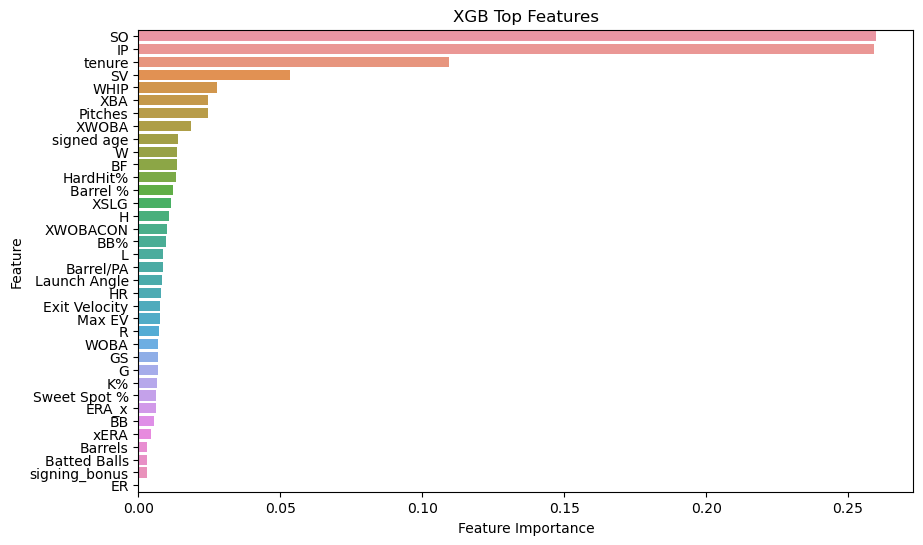

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGB Top Features')
plt.show()

## present

In [ ]:
import tkinter as tk
import math


stat = []
stat_nor = []

keyin =0

def process_input():
    # 在這裡處理輸入並執行適當的邏輯

    # 範例：取得使用者輸入的文字
    
    stat.append(eval(entry.get()))

    user_input = entry.get()
    
    # 所有待輸入數據
    all_data = ['signing_bonus', 'tenure', 'signed age', 'BF', 'W', 'L', 'ERA_x', 'G',
       'GS', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'Pitches',
       'Batted Balls', 'Barrels', 'Barrel %', 'Barrel/PA', 'Exit Velocity',
       'Max EV', 'Launch Angle', 'Sweet Spot %', 'XBA', 'XSLG', 'WOBA',
       'XWOBA', 'XWOBACON', 'HardHit%', 'K%', 'BB%', 'xERA',"","","","","","","",""]
    global keyin
    keyin += 1
    # 在這裡處理輸出並顯示在視窗上
    
    
    
    if keyin <36:
        output_text = "您已輸入["+ all_data[keyin-1] + "] : "+ user_input + "\n請接著輸入[" + all_data[keyin] + "]"
        output_label.config(text=output_text)
    elif keyin == 36:
        output_text = "您已輸入["+ all_data[keyin-1] + "] : "+ user_input +"\n已完成數據輸入，可開始評估 "
        output_label.config(text=output_text,font=("Arial",10), fg = "red")
    elif keyin > 36:
        output_text = "您已輸入完成，可開始評估 "
        output_label.config(text=output_text,font=("Arial",10), fg = "red")

    




def estimate():
    

    
    #new_data_predictions = tan(stat) 
    if len(stat) < 36:
        # 在這裡處理輸出並顯示在視窗上
        output_text = "數據不足，無法估計"
        output_label_2.config(text=output_text)
    elif len(stat) == 36:
        
        new_data_predictions = xgb_model.predict(np.array([stat]) )
        answer = math.exp(new_data_predictions)
    
        # 在這裡處理輸出並顯示在視窗上
        output_text = "合理薪資：" + str(answer)
        output_label_2.config(text=output_text)
    elif len(stat) > 36:
        stat_new = stat[:36]
        new_data_predictions = xgb_model.predict(np.array([stat_new]) )
        answer = math.exp(new_data_predictions)
        # 在這裡處理輸出並顯示在視窗上
        output_text = "數據過量，將只取前36項作估計\n合理薪資：" + str(answer)
        output_label_2.config(text=output_text)


# 建立主視窗
window = tk.Tk()
window.title('salary estimator')

window.iconbitmap("Baseball_Ball.ico")
window.geometry('380x400')
# 建立輸入框
entry = tk.Entry(window)
entry.place(x = 190,y = 200,anchor = "center")

# 建立按鈕

button = tk.Button(window, text="輸入數據", command=process_input)
button.place(x = 190,y = 230,anchor = "center")

# 建立輸出標籤
output_label = tk.Label(window)
output_label.place(x = 190,y = 255,anchor = "center")


# 建立按鈕2
button2 = tk.Button(window, text="進行預估",bg='#FFFF00', font=("Arial", 15) ,command=estimate)
button2.place(x = 190,y = 80,anchor = "center")

# 建立輸出標籤2
output_label_2 = tk.Label(window, font=("Arial", 15))
output_label_2.place(x = 190,y = 132,anchor = "center")

# 啟動視窗主迴圈
window.mainloop()

# --------------檢查輸入用
print(stat)
print(len(stat))

In [75]:
print(math.exp(xgb_model.predict(np.array([[3300000,7,28,744.0,12.0,7.0,3.31,29.0,29.0,0.0,182.1,150.0,69.0,67.0,14.0,55.0,179.0,1.12,2884,501,24,4.8,3.2,86.1,112.9,11.3,32.9,0.219,0.334,0.272,0.278,0.326,27.1,24.1,7.4,3.23]]))))

8576779.84688264
